In [98]:
import pandas as pd
from sklearn.inspection import plot_partial_dependence
import pickle
from pathlib import Path
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import (
    PolynomialFeatures,
    OneHotEncoder,
    LabelBinarizer,
    StandardScaler,
)

In [99]:
def model7(df):
    X = df[['spot', 'home', 'HPG', 'HPAB_p', 'factor', 'year', 'BAT_HAND', 'PIT_HAND']] # , 'avg_win'

    poly = PolynomialFeatures(2, interaction_only=True)
    X = poly.fit_transform(X)

    Y = df['Win']

    return X, Y

In [100]:
processed = Path('../data/processed')
data = pd.read_pickle(processed / 'main_data.pkl')

data = data.dropna()
data = data[data.G > 50]

X, Y = model7(data)

In [101]:
model_file = '../models/logistic_model.pkl'
with open(model_file, 'rb') as fp:
    fitted_model = pickle.load(fp)

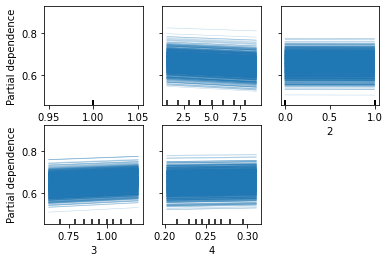

In [102]:
plot_partial_dependence(fitted_model, X, [0, 1, 2, 3, 4], kind='individual')

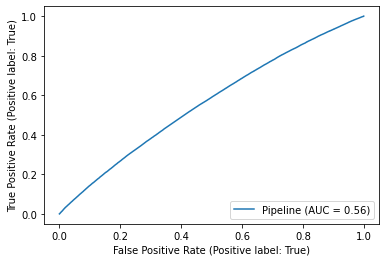

In [103]:
plot_roc_curve(fitted_model, X, Y)

In [106]:
est = fitted_model.predict(X)
data['Est'] = est
probs = fitted_model.predict_proba(X)
data['EstProb'] = probs[:,1]
data['Win'] = data['Win']*1

In [107]:
data['EstProb'].describe()

count    242673.000000
mean          0.653173
std           0.048256
min           0.456204
25%           0.618783
50%           0.655855
75%           0.688981
max           0.925029
Name: EstProb, dtype: float64

In [112]:
from sklearn.metrics import (
    accuracy_score, 
    balanced_accuracy_score,
    top_k_accuracy_score,
    average_precision_score,
)

In [113]:
print ("accuracy score : ", 
       accuracy_score(data['Win'], data['Est'])
)
print ("balanced accuracy score : ", 
       balanced_accuracy_score(data['Win'], data['Est'])
)
print ("top k score : ", 
       top_k_accuracy_score(data['Win'], data['EstProb'], k=1)
)
print ("average precision score : ", 
       average_precision_score(data['Win'], data['EstProb'])
)

accuracy score :  0.6516258504242335
balanced accuracy score :  0.5000775780508239
top k score :  0.6516258504242335
average precision score :  0.6974787492901168
